# Get results for Classifier fine-tuned version B


In [2]:
# setup 
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    balanced_accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# model name
model_name = "B_bert_model"
# load data
val_eval_df = pd.read_csv("../data/allresultsB/classifier_final_B_validation_results.csv")
test_eval_df = pd.read_csv("../data/allresultsB/classifier_final_B_test_results.csv")


In [3]:
# define function to display eval metrics
def get_metrics(true_labels, preds):
    metrics_summary = {}

    acc = accuracy_score(true_labels, preds)
    bal_acc = balanced_accuracy_score(true_labels, preds)

    precision = precision_score(true_labels, preds, average='macro', zero_division=0)
    recall = recall_score(true_labels, preds, average='macro', zero_division=0)
    f1 = f1_score(true_labels, preds, average='macro', zero_division=0)

    label_order = sorted(set(true_labels).union(set(preds)))
    report = classification_report(true_labels, preds, labels=label_order, zero_division=0)
    metrics_summary[model_name] = {
        'acc': acc,
        'bal_acc': bal_acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    # print metrics
    print(f"Model: {model_name}")
    print(f"  Accuracy: {acc}")
    print(f"  Balanced Accuracy: {bal_acc}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-score: {f1}")
    print(f"  Classification Report:\n{report}")


    # Confusion Matrix
    label_order = sorted(set(true_labels).union(set(preds)))
    cm = confusion_matrix(true_labels, preds, labels=label_order)
    cm_df = pd.DataFrame(cm, index=label_order, columns=label_order)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()


    return metrics_summary



In [5]:
val_eval_df

,probs,label,prediction_label
0,"[0.0014239456504583359, 0.0019654028583317995,...",LINKE,LINKE
1,"[0.0003912032407242805, 0.46477338671684265, 0...",CDU/CSU,SPD
2,"[0.0022474119905382395, 0.8135284185409546, 0....",CDU/CSU,CDU/CSU
3,"[0.0005725361406803131, 0.8844259977340698, 0....",SPD,CDU/CSU
4,"[0.0010369797237217426, 0.001443927874788642, ...",LINKE,LINKE
...,...,...,...
5413,"[0.0004531094164121896, 0.01007382944226265, 0...",SPD,SPD
5414,"[0.09368054568767548, 0.268177330493927, 0.185...",LINKE,CDU/CSU
5415,"[0.0003152365970890969, 0.004164611455053091, ...",SPD,SPD
5416,"[0.0013556198682636023, 0.06260082125663757, 0...",SPD,SPD


Model: B_bert_model
  Accuracy: 0.6757105943152455
  Balanced Accuracy: 0.6584479478771375
  Precision: 0.6955195409000142
  Recall: 0.6584479478771375
  F1-score: 0.6722766891077107
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.88      0.84      0.86       776
     CDU/CSU       0.65      0.76      0.70      1402
         FDP       0.66      0.51      0.58       713
       GRÜNE       0.63      0.50      0.55       712
       LINKE       0.76      0.66      0.71       581
         SPD       0.60      0.69      0.64      1234

    accuracy                           0.68      5418
   macro avg       0.70      0.66      0.67      5418
weighted avg       0.68      0.68      0.67      5418



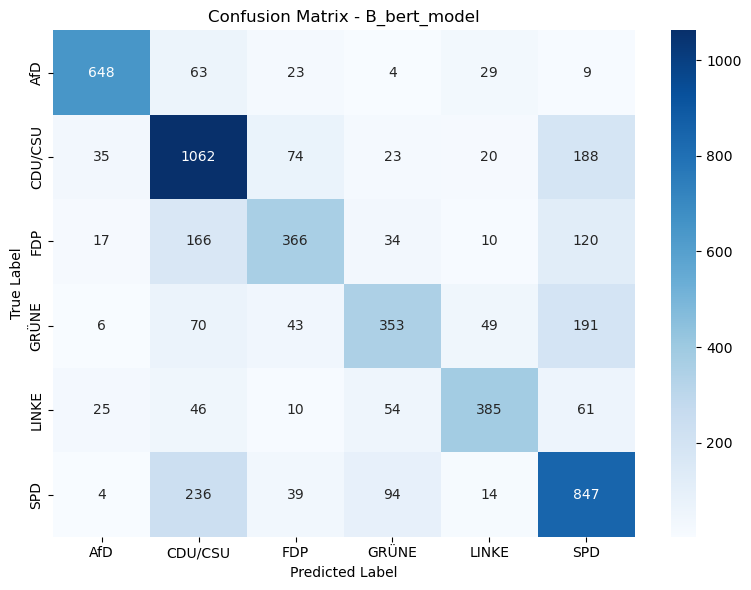

Model: B_bert_model
  Accuracy: 0.6661129568106312
  Balanced Accuracy: 0.6489939406438318
  Precision: 0.682558757132461
  Recall: 0.6489939406438318
  F1-score: 0.6603295096388823
  Classification Report:
              precision    recall  f1-score   support

         AfD       0.86      0.82      0.84       747
     CDU/CSU       0.66      0.76      0.71      1426
         FDP       0.60      0.52      0.56       678
       GRÜNE       0.64      0.45      0.53       804
       LINKE       0.75      0.65      0.70       593
         SPD       0.58      0.70      0.63      1170

    accuracy                           0.67      5418
   macro avg       0.68      0.65      0.66      5418
weighted avg       0.67      0.67      0.66      5418



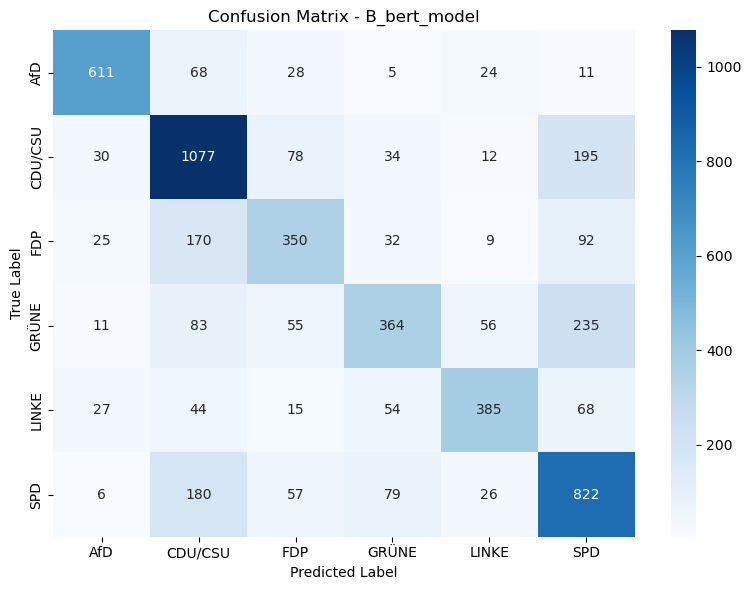

{'B_bert_model': {'acc': 0.6661129568106312,
  'bal_acc': 0.6489939406438318,
  'precision': 0.682558757132461,
  'recall': 0.6489939406438318,
  'f1': 0.6603295096388823}}

In [7]:
# evaluate
# On validation set
get_metrics(val_eval_df["label"], val_eval_df["prediction_label"])

# On test set
get_metrics(test_eval_df["label"], test_eval_df["prediction_label"])